# K-Means

Objective function:
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/8dc15ec63e0676fc07e790f61efd89484a6b7922)

that is, find k sets that minimize the within-cluster sum of squares (i.e. _inertia_).

Problems with K-Means:
- Inertia makes the assumption that clusters are convex and isotropic, which is not always the case. It responds poorly to elongated clusters, or manifolds with irregular shapes.
- Inertia is not a normalized metric: we just know that lower values are better and zero is optimal. But in very high-dimensional spaces, Euclidean distances tend to become inflated (this is an instance of the so-called “curse of dimensionality”). Running a dimensionality reduction algorithm such as PCA prior to k-means clustering can alleviate this problem and speed up the computations.

[Demonstration of K-Means assumptions](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html#sphx-glr-auto-examples-cluster-plot-kmeans-assumptions-py)


Index:  
[Naive implementation](#naive-implementation)

## Naive implementation

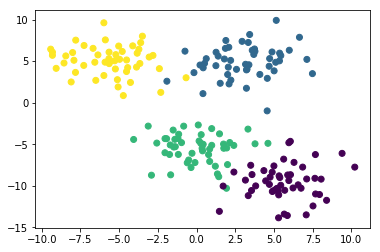

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs

(X, y) = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=2, random_state=10)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)
plt.show()

Done! #iterations:  13


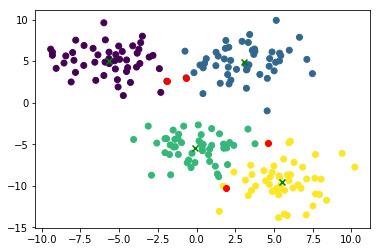

In [11]:
from collections import defaultdict

def predict(X, k):
    centroids_idx = np.random.choice(np.arange(X.shape[0]), k, replace=False)
    centroids = X[centroids_idx]
    old_assignment = None
    new_assignment = {}
    
    max_iterations = 50
    it = 0
    
    while old_assignment != new_assignment and it < max_iterations:
        old_assignment = new_assignment
        new_assignment = defaultdict(lambda: [])
        
        # expectation step
        for i, x in enumerate(X):
            distances = np.linalg.norm(centroids - x, axis=1)
            nearest_centroid = np.argmin(distances)
            new_assignment[nearest_centroid].append(i)
        
        # maximization step
        for c in range(k):
            cluster_indices = new_assignment[c]
            # print(cluster_indices)
            # print(X[cluster_indices])
            mean = np.mean(X[cluster_indices], axis=0)
            centroids[c] = mean
        
        it += 1
    
    print("Done! #iterations: ", it)
    y_pred = [(index, centroid_id) for centroid_id, cluster_indices in new_assignment.items() for index in cluster_indices]
    y_pred = list(map(lambda e: e[1], sorted(y_pred, key=lambda e: e[0])))
    
    return y_pred, centroids

K = 4
y_pred, centroids = predict(X, K)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y_pred)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='g')


# plot misclassified points - makes sense only if k_true = k_fit
from_pred_class_to_dataset_class = {}
for c in range(K):
    centroid = centroids[c]
    nearest_point_idx = np.argmin(np.linalg.norm(X - centroid, axis=1))
    nearest_class = y[nearest_point_idx]
    from_pred_class_to_dataset_class[c] = nearest_class

y_pred = np.array([from_pred_class_to_dataset_class[c] for c in y_pred])

misclassified_points = X[y != y_pred]
plt.scatter(misclassified_points[:, 0], misclassified_points[:, 1], c='r')


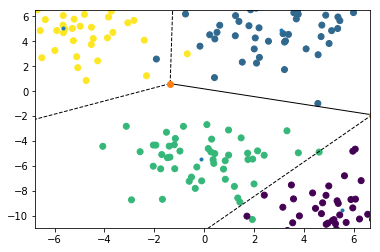

In [14]:
# Draw Voronoi diagrams

points = np.array(centroids)
from scipy.spatial import Voronoi, voronoi_plot_2d
vor = Voronoi(points)
import matplotlib.pyplot as plt

voronoi_plot_2d(vor)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)
# plt.show()


### evaluation of performance (e.g. purity, completeness, mutual information)

## Using scikit-learn